# Applications of Machine Learning in Remote Sensing
## Homework 1
#### Nakul Poudel – np1140@rit.edu
#### https://github.com/

# Problem 1

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmocean
import numpy.ma as ma
import seaborn as sns


In [2]:
data = np.load("sentinel2_rochester.npy")

In [3]:
print(data.shape)
print(data.dtype)
print(data.min(), data.max(), data.mean())
print(data[0, 0, :])

(954, 716, 12)
float64
0.0 0.9295 0.17740287951299816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
def plot_band(data):
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()
    for i in range(data.shape[2]):
        band = data[:, :, i]
        stretched = (band - band.min()) / (band.max() - band.min())

        im = axes[i].imshow(stretched, cmap=cmocean.cm.balance)
        axes[i].set_title(f'Band {i+1}')
        # axes[i].axis('off')
        fig.colorbar(im, ax=axes[i], shrink=0.8)


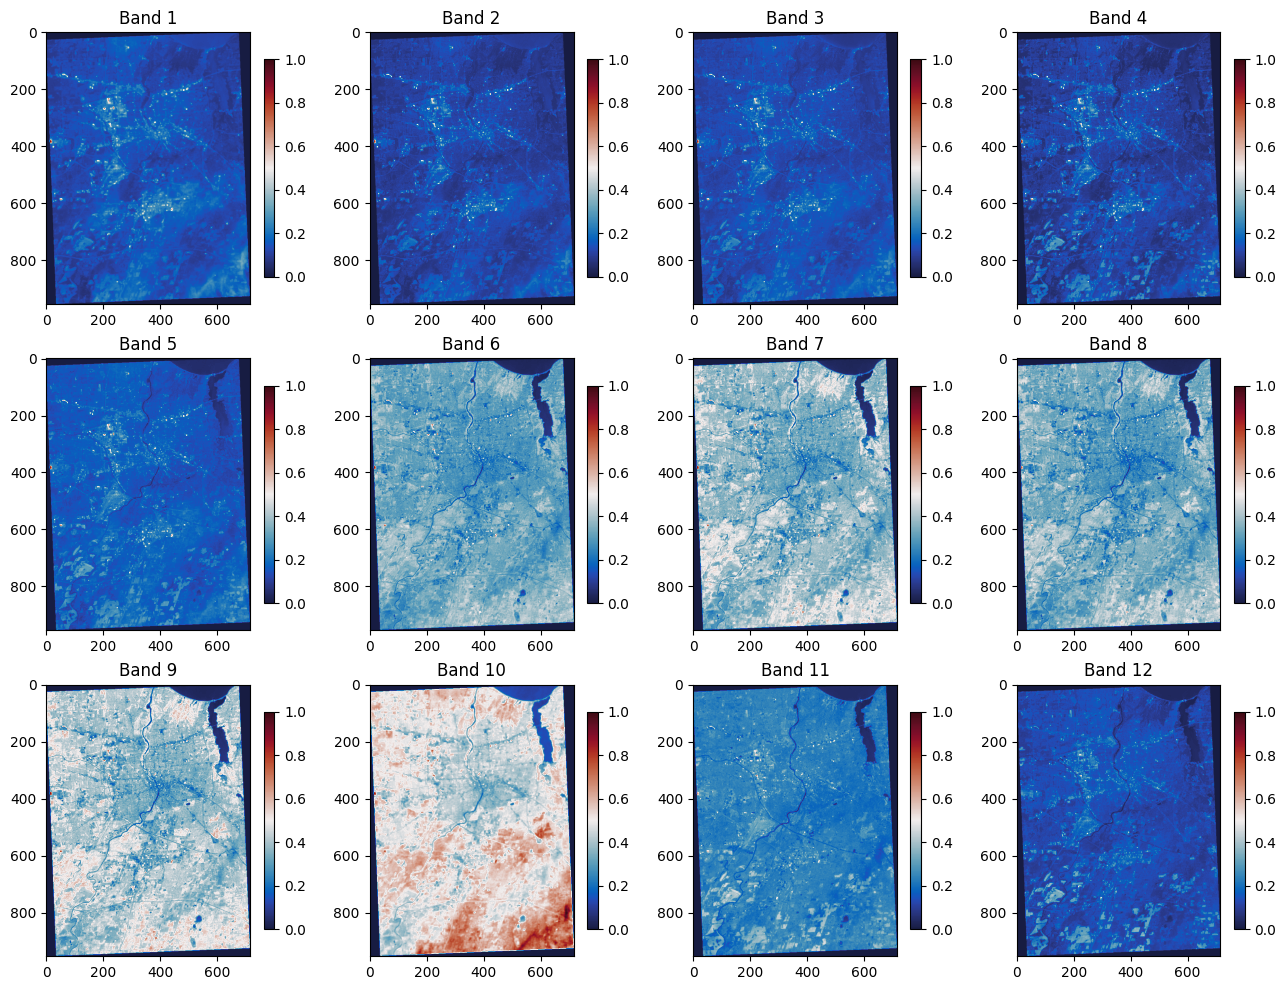

In [5]:
plot_band(data)

## Stretching

In [6]:
data = np.load("sentinel2_rochester.npy")

num_bands = data.shape[2]

for i in range(num_bands):
    band = data[:, :, i]
    # Mask nodata
    valid_band = ma.masked_equal(band, 0)
    # Compute percentiles on valid data
    p2 = np.percentile(valid_band.compressed(), 2)
    p98 = np.percentile(valid_band.compressed(), 98)
    print(f"Band {i+1}: 2nd percentile = {p2:.4f}, 98th percentile = {p98:.4f}")


Band 1: 2nd percentile = 0.0526, 98th percentile = 0.1557
Band 2: 2nd percentile = 0.0535, 98th percentile = 0.1685
Band 3: 2nd percentile = 0.0659, 98th percentile = 0.1821
Band 4: 2nd percentile = 0.0439, 98th percentile = 0.2064
Band 5: 2nd percentile = 0.0562, 98th percentile = 0.2366
Band 6: 2nd percentile = 0.0464, 98th percentile = 0.3441
Band 7: 2nd percentile = 0.0481, 98th percentile = 0.4186
Band 8: 2nd percentile = 0.0473, 98th percentile = 0.4277
Band 9: 2nd percentile = 0.0462, 98th percentile = 0.4413
Band 10: 2nd percentile = 0.0969, 98th percentile = 0.5149
Band 11: 2nd percentile = 0.0447, 98th percentile = 0.3148
Band 12: 2nd percentile = 0.0388, 98th percentile = 0.2796


In [7]:
def plot_band(data):
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()
    
    for i in range(data.shape[2]):
        band = np.ma.masked_equal(data[:, :, i], 0)
        
        p2, p98 = np.percentile(band.compressed(), [2, 98])
        
        # Percentile-based stretching
        stretched = np.clip((band - p2) / (p98 - p2) * 255, 0, 255)
        stretched = stretched.astype(np.uint8)  # fill nodata with 0
        
        im = axes[i].imshow(stretched, cmap=cmocean.cm.balance)
        axes[i].set_title(f'Band {i+1}')
        axes[i].axis('off')
        fig.colorbar(im, ax=axes[i], shrink=0.8)
        
    plt.tight_layout()
    plt.show()

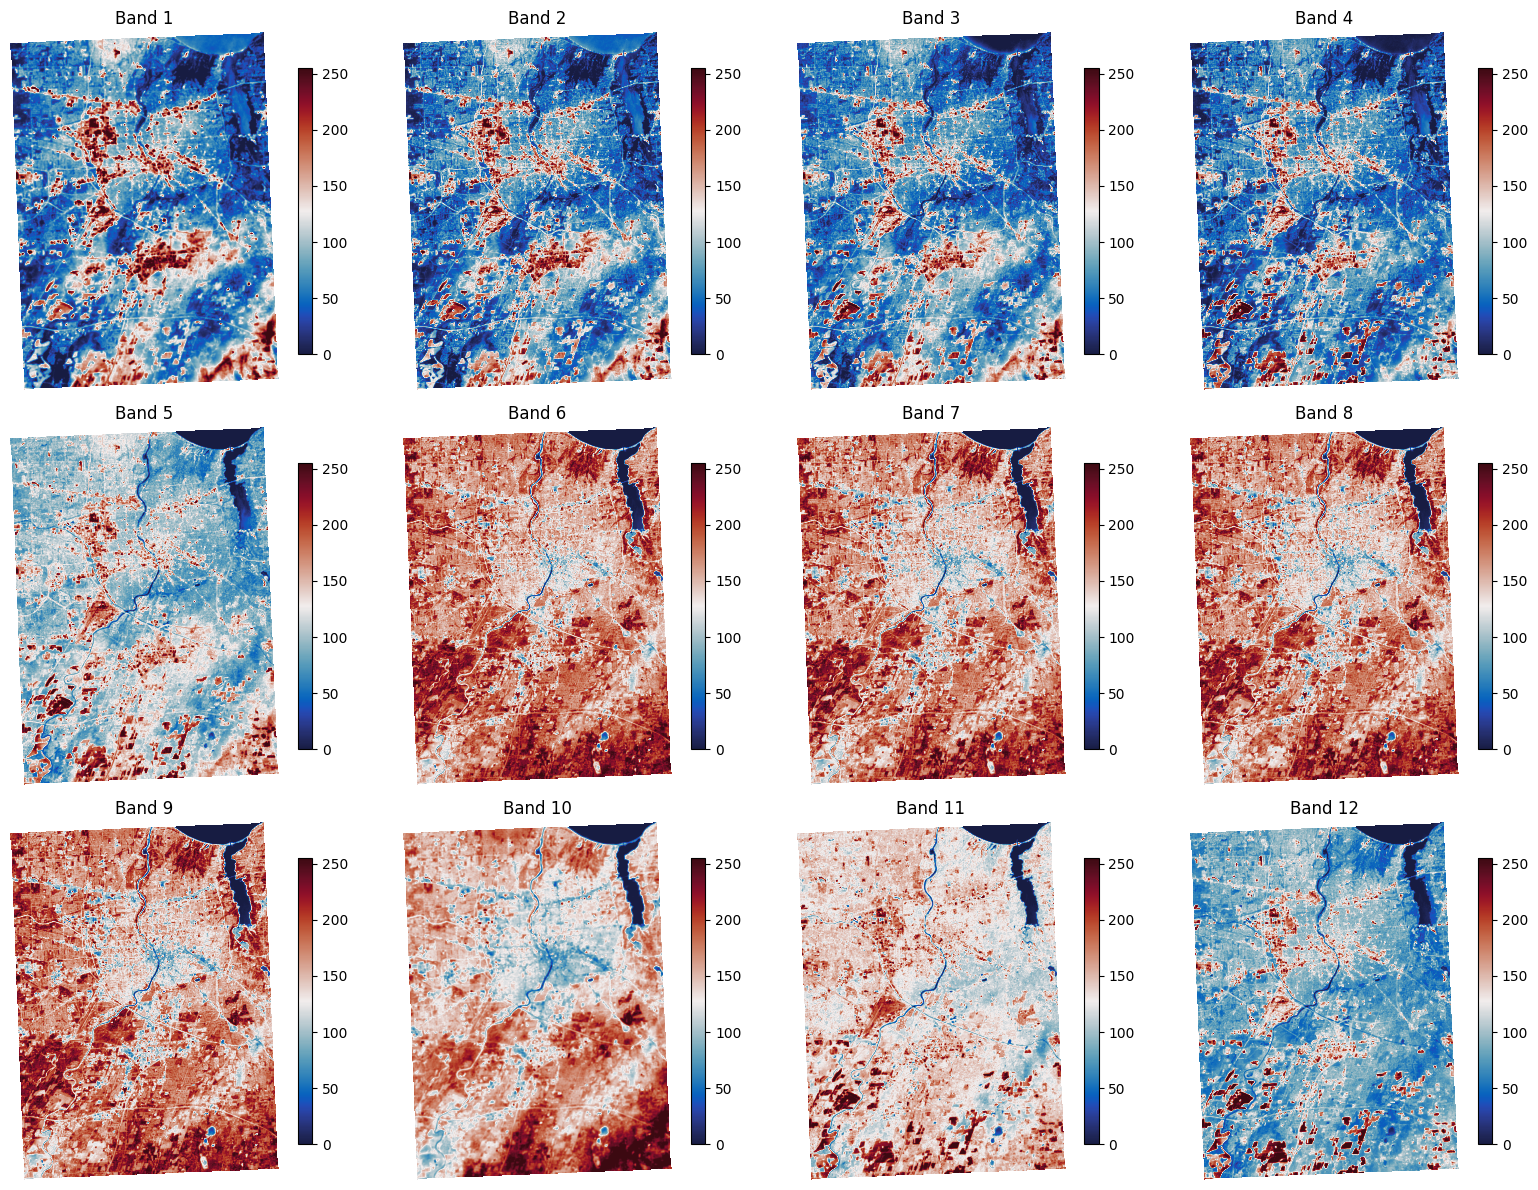

In [8]:
plot_band(data)

Stretching enhances the visualization of image regions by scaling pixel values. Here the pixels are stretched to the 0–255 range based on the 2nd and 98th percentiles. Pixels below the 2nd percentile and above the 98th percentile are ignored for each band, resulting in improved contrast.

# No data check

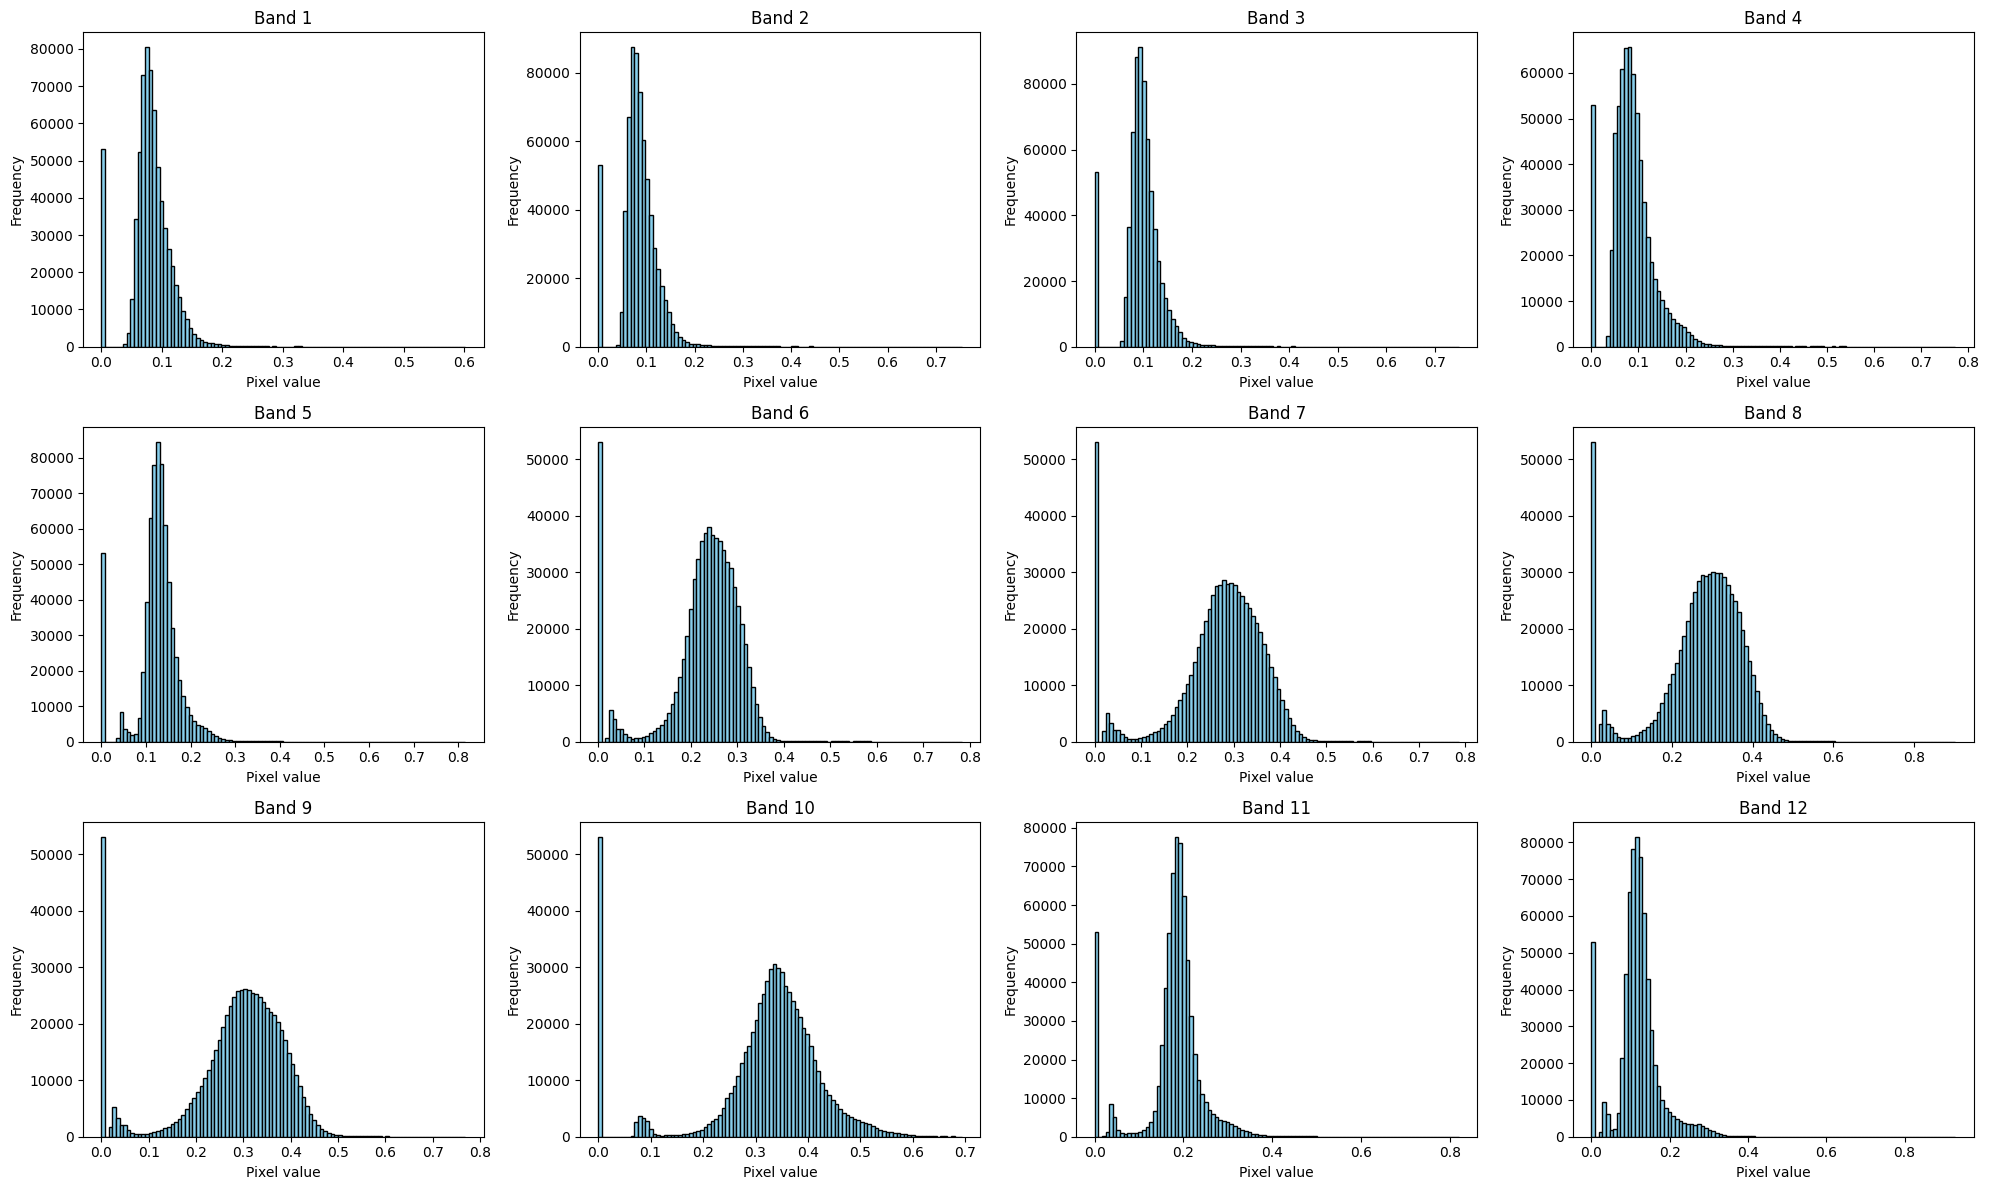

In [9]:
# determine the data distribution


data = np.load("sentinel2_rochester.npy") 
H, W, B = data.shape


fig, axes = plt.subplots(3, 4, figsize=(20, 12))  
axes = axes.flatten()  

for b in range(B):
    band = data[:, :, b].flatten()    
    axes[b].hist(band, bins=100, color='skyblue', edgecolor='black')
    axes[b].set_title(f"Band {b+1}")
    axes[b].set_xlabel("Pixel value")
    axes[b].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


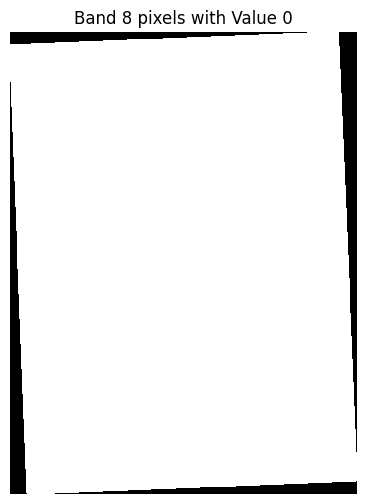

In [10]:

data = np.load("sentinel2_rochester.npy")

band8 = data[:, :, 7]

zero_mask = ma.masked_where(band8 != 0, band8)

plt.figure(figsize=(6, 6))
plt.imshow(zero_mask, cmap='gray')
plt.title("Band 8 pixels with Value 0")
plt.axis('off')
plt.show()


Here, the no-data regions are represented by zeros. To identify these areas, we first plotted the data distribution, which revealed a large number of pixels with a value of zero. Subsequently, plotting only the pixels with zero values highlighted the no-data regions.

# Problem 2

In [11]:
def calculate_band_statistics(data):
    stats = {}
    for i in range(data.shape[2]):
        band = data[:, :, i]
        band[band == 0] = np.nan # Exclude no data
        stats[f'Band {i+1}'] = {
           
            'mean': np.nanmean(band),
            'std': np.nanstd(band),
            'max': np.nanmax(band),
            'min': np.nanmin(band),
            'q1': np.nanpercentile(band, 25),
            'median': np.nanmedian(band),
            'q3': np.nanpercentile(band, 75),
            'skewness': (np.nanmean((band - np.nanmean(band))**3)) / (np.nanstd(band)**3) if np.nanstd(band) != 0 else 0,
            'kurtosis': (np.nanmean((band - np.nanmean(band))**4)) / (np.nanstd(band)**4) if np.nanstd(band) != 0 else 0
        }
    return stats    

In [12]:
data = np.load("sentinel2_rochester.npy")

stats = calculate_band_statistics(data)

In [13]:
# make a table of the statistics
df = pd.DataFrame(stats).T
print(df)


             mean       std     max     min      q1  median      q3  skewness  \
Band 1   0.088682  0.027914  0.6021  0.0333  0.0709  0.0829  0.1007  2.920508   
Band 2   0.092542  0.035001  0.7542  0.0386  0.0716  0.0853  0.1053  4.478896   
Band 3   0.105496  0.034365  0.7484  0.0430  0.0858  0.0987  0.1168  4.692240   
Band 4   0.094311  0.044454  0.7728  0.0326  0.0663  0.0850  0.1093  3.231439   
Band 5   0.136721  0.040905  0.8159  0.0346  0.1152  0.1310  0.1506  3.108017   
Band 6   0.243593  0.061036  0.7830  0.0176  0.2131  0.2472  0.2830 -0.708535   
Band 7   0.285838  0.077305  0.7859  0.0161  0.2444  0.2903  0.3377 -0.710117   
Band 8   0.291384  0.080328  0.9030  0.0188  0.2475  0.2976  0.3464 -0.716092   
Band 9   0.303507  0.082224  0.7689  0.0157  0.2605  0.3098  0.3595 -0.821525   
Band 10  0.345083  0.077947  0.6934  0.0653  0.3052  0.3446  0.3882 -0.395654   
Band 11  0.191718  0.048364  0.8196  0.0218  0.1710  0.1889  0.2086  0.521929   
Band 12  0.129180  0.048550 

Explanation of each statistics <br />
Mean: Average value of data. <br />
Standard deviation: Measure of varaibility in data. High standard deviation indicates high variability. <br />
Minimum and Maximum value: The maximum and minimum data point.<br />
Quartiles (Q1, median, Q3): Q1, Q2(median), and Q3 are the values below which 25\%, 50\% and 75\% of the data points lies. <br />
Skewness: Measurement of the asymmetry of the dataset. Data can be positively (long tail on right) and negatively (long tail on left) skewed. <br />
Kurtosis: Measurement of peakedness (degree to which data values are concentrated around the mean) and long tails of the dataset.<br />

### Data standarization

In [14]:
# function to standarize data for each band, compute z score for all pixels in that band
def standardize_bands(data):
    standardized = np.empty_like(data)
    for i in range(data.shape[2]):
        band = data[:, :, i]
        band[band == 0] = np.nan # Exclude no data

        mean = np.nanmean(band)
        std = np.nanstd(band)
        standardized[:, :, i] = (band - mean) / std if std != 0 else band - mean
    return standardized 

In [15]:
data = np.load("sentinel2_rochester.npy")
standardized_data = standardize_bands(data)


In [16]:
# histogram of original data and using standarize data to highlight the outliers
def plot_histograms(original, standardized):
    fig, axes = plt.subplots(6, 4, figsize=(16, 8))
    axes = axes.flatten()
    for i in range(original.shape[2]):
        axes[i].hist(original[:, :, i].flatten(), bins=50, color='blue', alpha=0.7)
        axes[i].set_title(f'Original Band {i+1}')
    for i in range(standardized.shape[2]):
        axes[i+12].hist(standardized[:, :, i].flatten(), bins=50, color='red', alpha=0.7)
        axes[i+12].set_title(f'Standardized Band {i+1}')
    plt.tight_layout()
    plt.show()

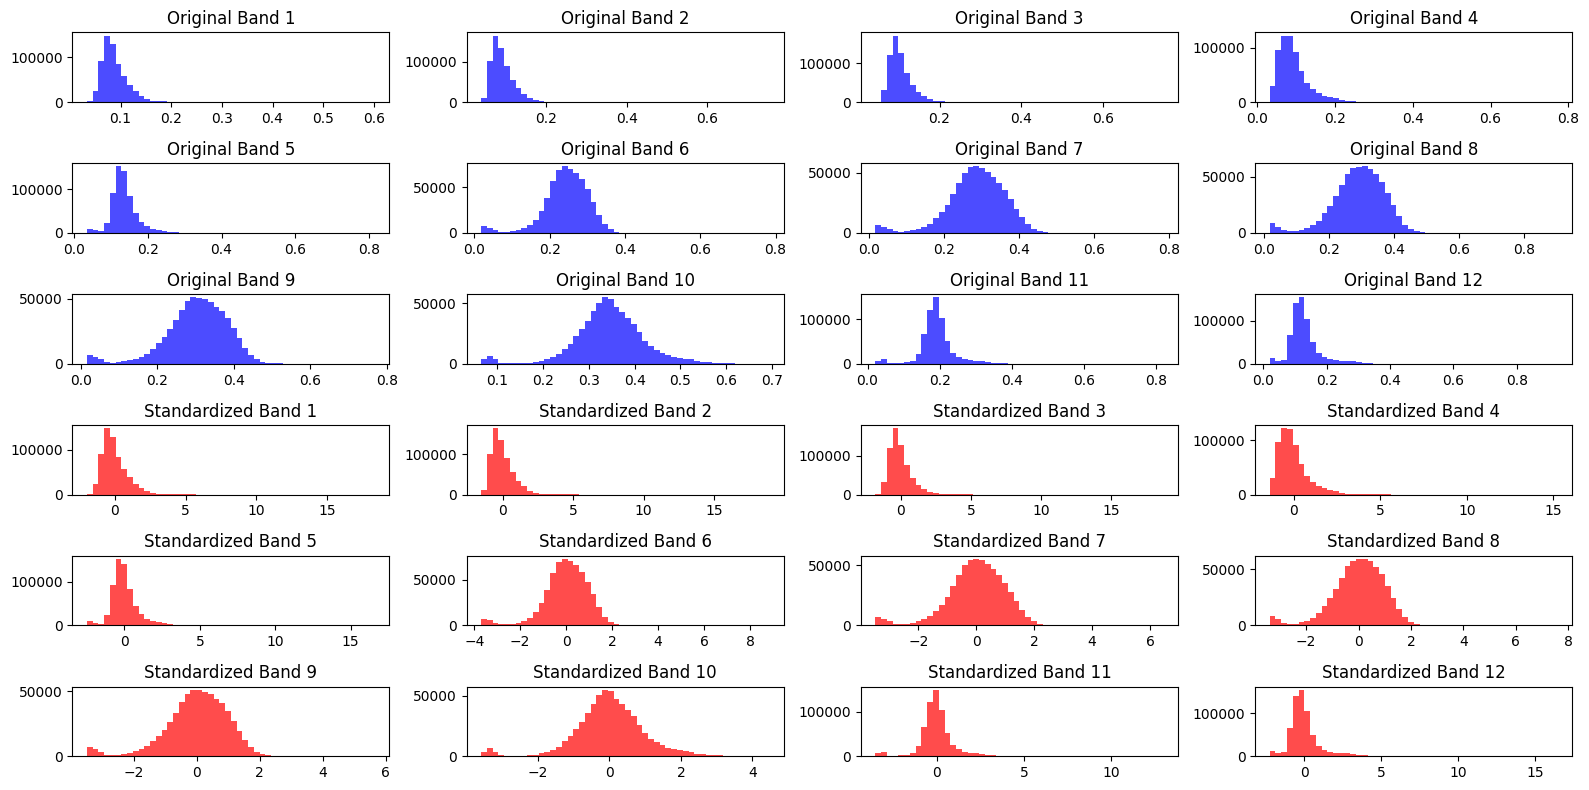

In [17]:
plot_histograms(data, standardized_data)

Standardization transforms the data so each band has a mean of **0** and a standard deviation of **1**, without changing the shape of the distribution.  

Values with a standardized score satisfying $|z| \ge 2$ can be considered outliers. However, the exact threshold can be determined based on the data’s nature.

# Problem 3

In [18]:
data = np.load("sentinel2_rochester.npy")

H, W, B = data.shape  

X = data.reshape(-1, B)
X = np.where(X == 0, np.nan, X)

# cov_matrix = np.cov(X, rowvar=False)

# print("Covariance matrix shape:", cov_matrix.shape)

df = pd.DataFrame(X, columns=[f"Band {i+1}" for i in range(B)])
corr_matrix = df.corr(method="pearson")

print("Correlation matrix shape:", corr_matrix.shape)
# print(corr_matrix)

Correlation matrix shape: (12, 12)


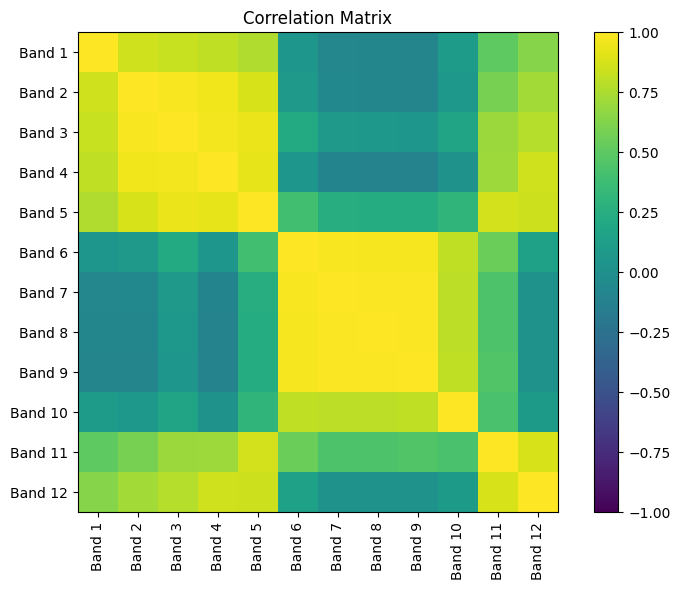

In [19]:
def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title(title)
    plt.xticks(ticks=np.arange(matrix.shape[0]), labels=[f'Band {i+1}' for i in range(matrix.shape[0])], rotation=90)
    plt.yticks(ticks=np.arange(matrix.shape[0]), labels=[f'Band {i+1}' for i in range(matrix.shape[0])])
    plt.tight_layout()
    plt.show()
    
# plot_matrix(cov_matrix, "Covariance Matrix")    
plot_matrix(corr_matrix, "Correlation Matrix")

The correlation matrix of all bands, shown as an image, is a square and symmetric matrix. It represents how strongly each pair of bands is related to one another. From the plot, we can infer that Bands 1–5, Bands 6–10, and Bands 11–12 are highly correlated within their respective groups. For downstream tasks, one representative band from each correlated group may be selected to reduce redundancy and enable more efficient computation.

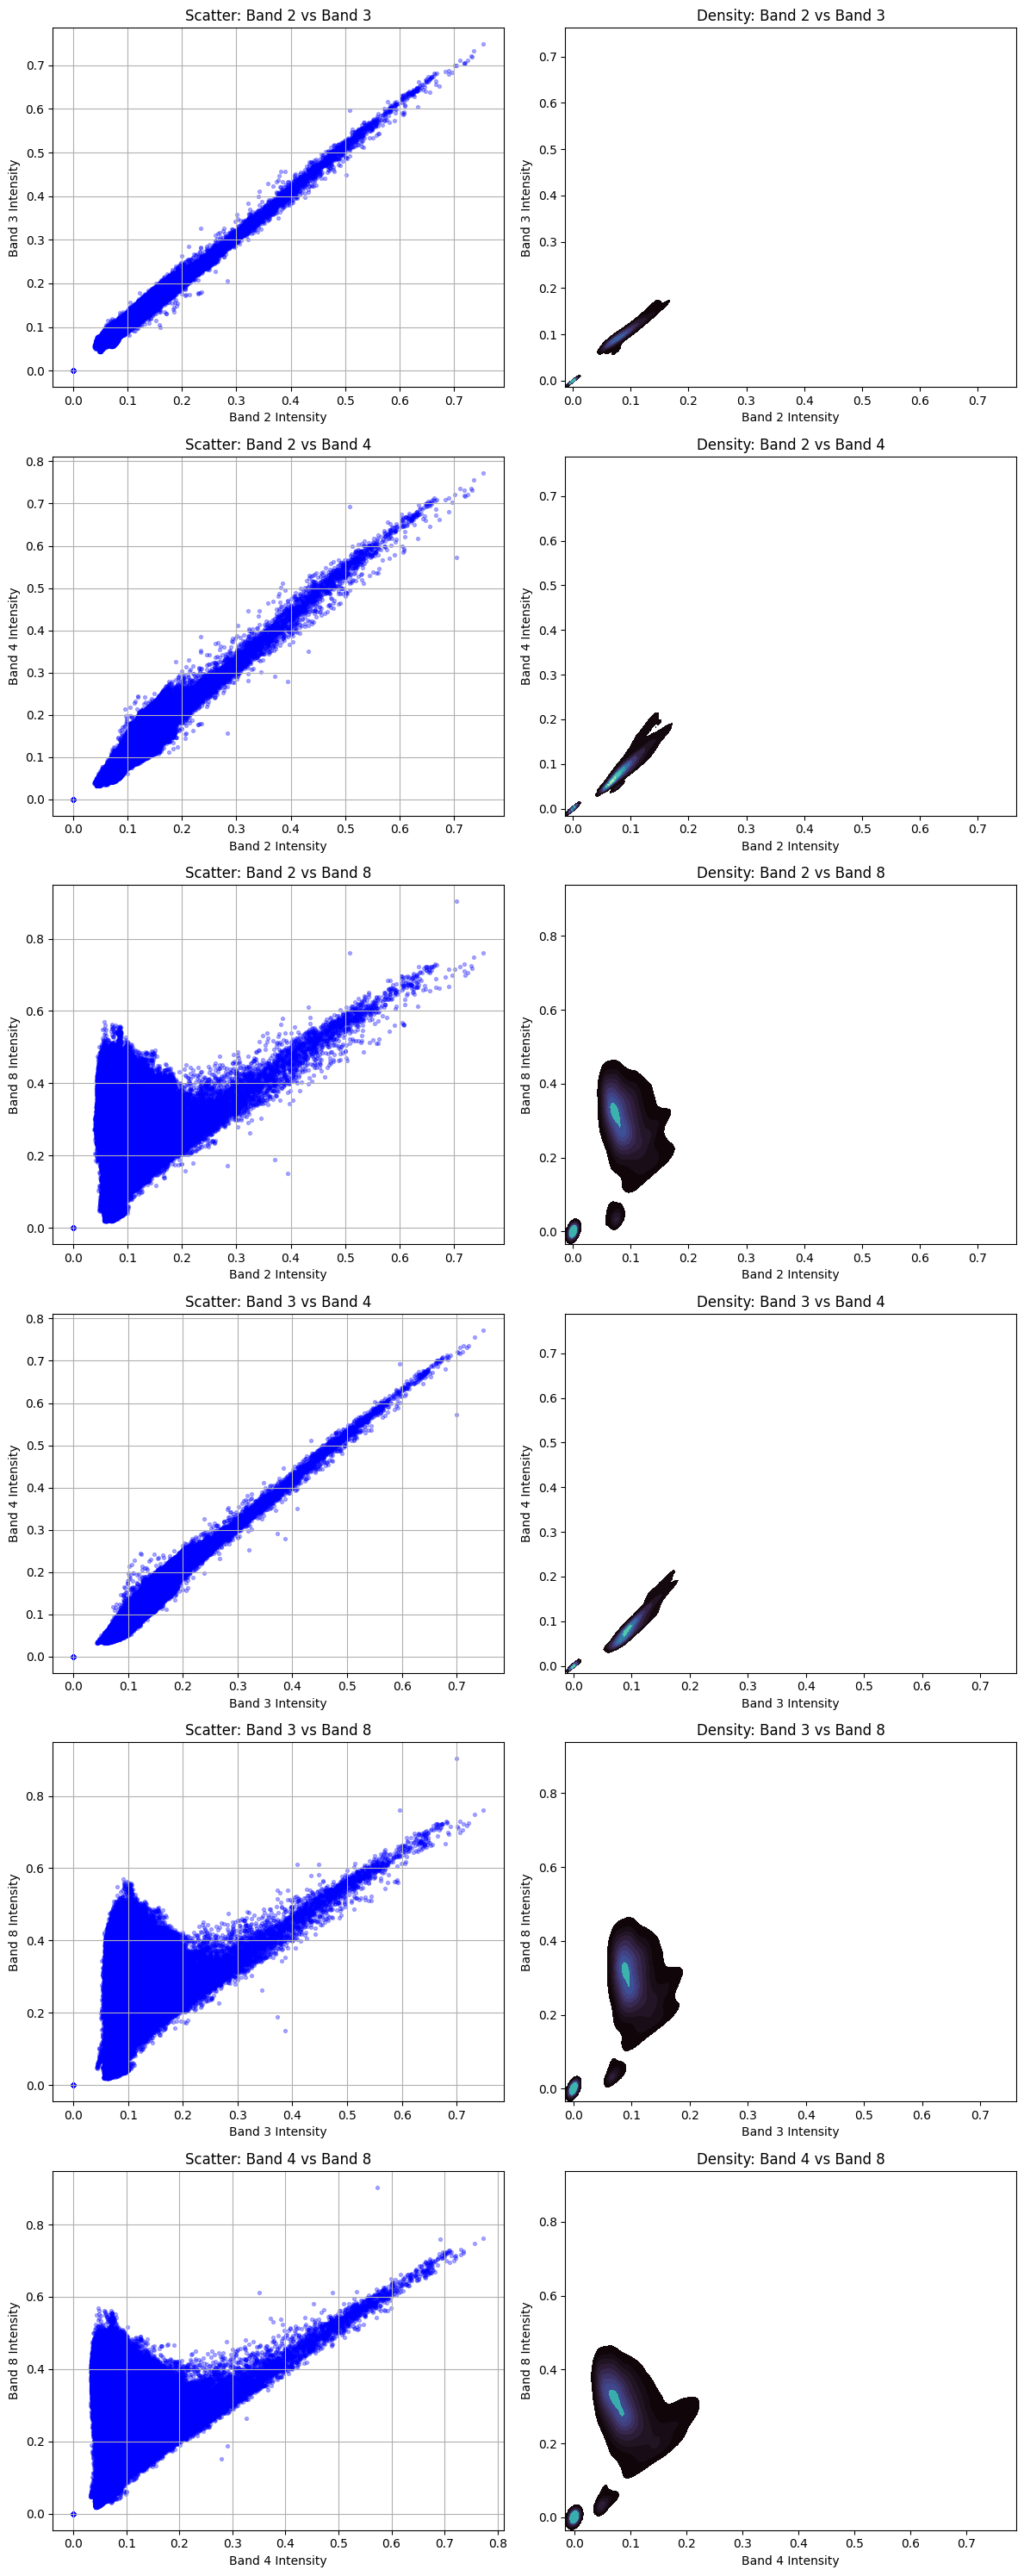

In [20]:
def correlation_plot(X, band_pairs):
    H, W, B = X.shape
    X2 = X.reshape(-1, B)

    n = len(band_pairs)
    fig, axes = plt.subplots(n, 2, figsize=(12, 5*n))

    if n == 1:
        axes = np.array([axes])  # ensure axes is 2D even for single pair

    for i, (band_x, band_y) in enumerate(band_pairs):
        # Convert to 0-based index
        band_x -= 1
        band_y -= 1

        # Scatter plot
        axes[i, 0].scatter(X2[:, band_x], X2[:, band_y], alpha=0.3, s=8, color="blue")
        axes[i, 0].set_title(f"Scatter: Band {band_x+1} vs Band {band_y+1}")
        axes[i, 0].set_xlabel(f"Band {band_x+1} Intensity")
        axes[i, 0].set_ylabel(f"Band {band_y+1} Intensity")
        axes[i, 0].grid(True)

        # Density plot
        sns.kdeplot(
            x=X2[:, band_x],
            y=X2[:, band_y],
            fill=True,
            cmap="mako",
            ax=axes[i, 1]
        )
        axes[i, 1].set_title(f"Density: Band {band_x+1} vs Band {band_y+1}")
        axes[i, 1].set_xlabel(f"Band {band_x+1} Intensity")
        axes[i, 1].set_ylabel(f"Band {band_y+1} Intensity")

    plt.tight_layout()
    plt.show()


data = np.load("sentinel2_rochester.npy")
band_pairs = [(2, 3), (2, 4), (2, 8), (3, 4), (3, 8), (4, 8)]
# band_pairs = [(2, 3)]

correlation_plot(data, band_pairs)


The scatter plot shows the data points. However, due to the large number of points, it is difficult to discern regions where the points are densely packed. The density plot helps visualize these concentrations. The data values range approximately between 0 and 0.7, with most points concentrated between 0.2 and 0.4 across all band pairs. In the density plot, the brightest areas indicate the highest concentration of points. The high concentration at 0 indicates large number of pixels corresponding to no-data. 

# Problem 4

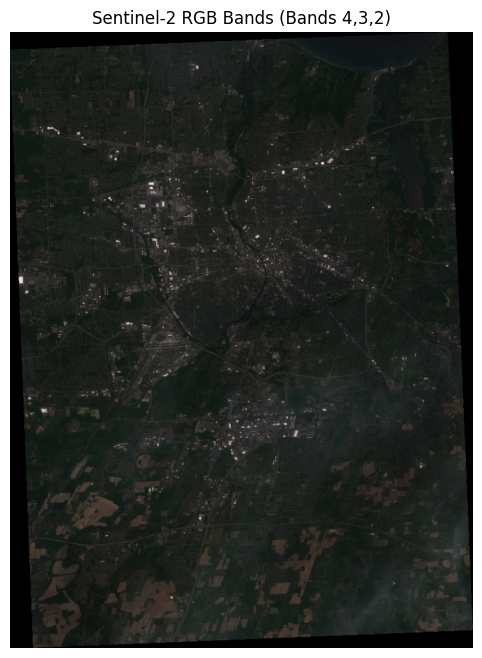

In [21]:
sentinel_data = np.load("sentinel2_rochester.npy")  # (H, W, 12)

blue = sentinel_data[:, :, 1]
green = sentinel_data[:, :, 2]
red = sentinel_data[:, :, 3]

rgb_image = np.stack([red, green, blue], axis=-1)

rgb_image = rgb_image / np.max(rgb_image)

plt.figure(figsize=(8, 8))
plt.imshow(rgb_image)
plt.title("Sentinel-2 RGB Bands (Bands 4,3,2)")
plt.axis('off')
plt.show()

## Vegetation Category

In [22]:
file_path = "JPL_Data/vegetation.tree.quercus.agrifolia.vswir.jpl108.jpl.asd.spectrum.txt"
data = pd.read_csv(file_path, sep=None, engine='python', header=None, names=['wavelength', 'reflectance'])

data['reflectance'] = data['reflectance'] / 100.0

# sentinel2 wavelengths in micrometers
target_wavelengths = np.array([0.443, 0.490, 0.560, 0.665, 0.705, 0.740, 
                               0.783, 0.842, 0.865, 0.940, 1.610, 2.190])

interpolated_reflectance = np.interp(target_wavelengths, data['wavelength'], data['reflectance']) # downsampled to the Sentinel-2 bands

downsized = pd.DataFrame({
    'wavelength': target_wavelengths,
    'reflectance': interpolated_reflectance
})

print(downsized)

    wavelength  reflectance
0        0.443      0.05774
1        0.490      0.05881
2        0.560      0.10571
3        0.665      0.05866
4        0.705      0.13995
5        0.740      0.35987
6        0.783      0.39442
7        0.842      0.39240
8        0.865      0.39260
9        0.940      0.39335
10       1.610      0.25691
11       2.190      0.14843


In [23]:
sentinel_data = np.load("sentinel2_rochester.npy")  # (H, W, 12)

ref_spectrum = downsized['reflectance']

H, W, B = sentinel_data.shape
pixels = sentinel_data.reshape(-1, B)  # (HW, 12)

dot_product = np.dot(pixels, ref_spectrum)
pixels_norm = np.linalg.norm(pixels, axis=1)
ref_norm = np.linalg.norm(ref_spectrum)
cos_theta = dot_product / (pixels_norm * ref_norm)  # cosine similarity

angles = np.arccos(np.clip(cos_theta, -1, 1)) # radians


lowest_idx = np.argsort(angles)[:100]
lowest_angles = angles[lowest_idx]
lowest_pixels = pixels[lowest_idx]

print("100 pixels with lowest spectral angle:")
for i, angle in enumerate(lowest_angles):
    if i in (0, 49, 99):

        print(f"Pixel {i}: Angle (degrees) = {np.degrees(angle):.2f}, Spectrum = {lowest_pixels[i]}")


100 pixels with lowest spectral angle:
Pixel 0: Angle (degrees) = 2.57, Spectrum = [0.0667 0.066  0.0935 0.0676 0.1319 0.3052 0.3624 0.3694 0.3734 0.3643
 0.2289 0.1388]
Pixel 49: Angle (degrees) = 3.13, Spectrum = [0.0643 0.0616 0.0862 0.061  0.1283 0.2895 0.3447 0.3401 0.3628 0.3638
 0.2151 0.1214]
Pixel 99: Angle (degrees) = 3.25, Spectrum = [0.061  0.0662 0.0905 0.0625 0.1274 0.2958 0.3499 0.3556 0.3713 0.3618
 0.2103 0.1163]


/tmp/ipykernel_953816/3498941532.py:11: RuntimeWarning: invalid value encountered in divide
  cos_theta = dot_product / (pixels_norm * ref_norm)  # cosine similarity


### Spectra of the 1st, 50th, and 100th

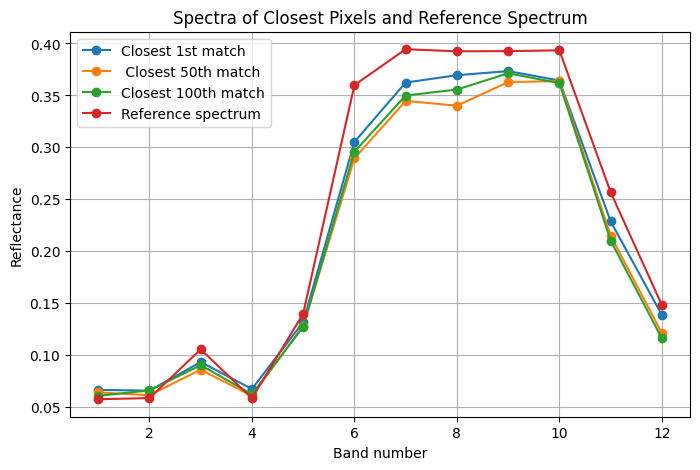

In [24]:
spectra_to_plot = [lowest_pixels[0], lowest_pixels[49], lowest_pixels[99], ref_spectrum]
labels = ["Closest 1st match", " Closest 50th match", "Closest 100th match", "Reference spectrum"]

bands = np.arange(1, 13)

plt.figure(figsize=(8, 5))
for spec, label in zip(spectra_to_plot, labels):
    plt.plot(bands, spec, marker='o', label=label)

plt.xlabel("Band number")
plt.ylabel("Reflectance")
plt.title("Spectra of Closest Pixels and Reference Spectrum")
plt.legend()
plt.grid(True)
plt.show()


Overall, all the spectra closely resemble the reference spectrum. Between bands 7 and 10, the reference spectrum remains relatively stable, and the 1st closest match exhibits a similar behavior. In contrast, the 50th and 100th matches show more noticeable deviations in this region.

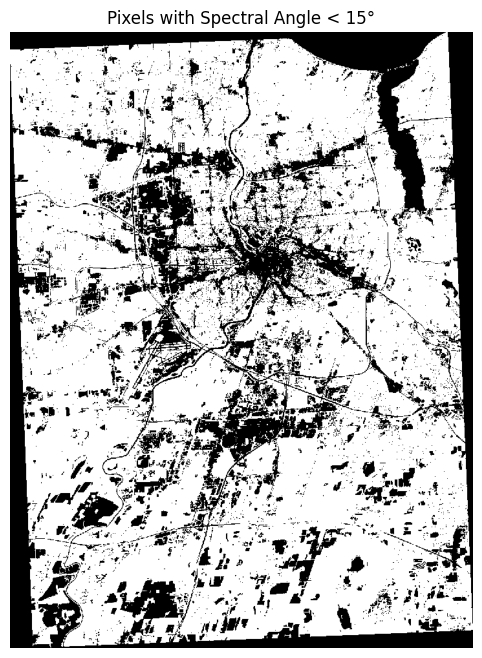

In [ ]:
threshold = np.radians(15)

mask = (angles <= threshold)
mask = mask.astype(np.uint8)
mask_img = mask.reshape(H, W)
# Plot
plt.figure(figsize=(8, 8))
plt.imshow(mask_img, cmap="gray")
plt.title("Pixels with Spectral Angle < 15°")
plt.axis("off")
plt.show()


In the binary mask, white pixels (value 1) represent vegetation pixels with spectral angles below the threshold (15°), while black pixels (value 0) represent non-vegetation.

## Asphalt Category

In [26]:
file_path = "JPL_Data/manmade.road.pavingasphalt.solid.all.0674uuuasp.jhu.becknic.spectrum.txt"
data = pd.read_csv(file_path, sep=None, engine='python', header=None, names=['wavelength', 'reflectance'])

data['reflectance'] = data['reflectance'] / 100.0

# sentinel2 wavelengths
target_wavelengths = np.array([0.443, 0.490, 0.560, 0.665, 0.705, 0.740, 
                               0.783, 0.842, 0.865, 0.940, 1.610, 2.190])

interpolated_reflectance = np.interp(target_wavelengths, data['wavelength'], data['reflectance'])

downsized = pd.DataFrame({
    'wavelength': target_wavelengths,
    'reflectance': interpolated_reflectance
})

print(downsized)

    wavelength  reflectance
0        0.443      0.06985
1        0.490      0.07220
2        0.560      0.07620
3        0.665      0.07965
4        0.705      0.08060
5        0.740      0.08140
6        0.783      0.08220
7        0.842      0.08292
8        0.865      0.08350
9        0.940      0.08460
10       1.610      0.08355
11       2.190      0.08035


In [27]:
sentinel_data = np.load("sentinel2_rochester.npy")  # (H, W, 12)

ref_spectrum = downsized['reflectance']

H, W, B = sentinel_data.shape
pixels = sentinel_data.reshape(-1, B)  # (HW, 12)

dot_product = np.dot(pixels, ref_spectrum)
pixels_norm = np.linalg.norm(pixels, axis=1)
ref_norm = np.linalg.norm(ref_spectrum)
try:
    cos_theta = dot_product / (pixels_norm * ref_norm)  # cosine similarity
except RuntimeWarning:
    print("Warning: Division by zero encountered in cosine similarity calculation.")
angles = np.arccos(np.clip(cos_theta, -1, 1)) # radians


lowest_idx = np.argsort(angles)[:100]
lowest_angles = angles[lowest_idx]
lowest_pixels = pixels[lowest_idx]

print("100 pixels with lowest spectral angle:")
for i, angle in enumerate(lowest_angles):
    if i in (0, 49, 99):
        print(f"Pixel {i}: Angle (degrees) = {np.degrees(angle):.2f}, Spectrum = {lowest_pixels[i]}")


100 pixels with lowest spectral angle:
Pixel 0: Angle (degrees) = 1.60, Spectrum = [0.252  0.2881 0.2918 0.3084 0.3245 0.3158 0.3063 0.3129 0.3152 0.3234
 0.3305 0.3053]
Pixel 49: Angle (degrees) = 2.61, Spectrum = [0.1917 0.2264 0.2402 0.2558 0.2708 0.2649 0.2688 0.2671 0.2695 0.2857
 0.2812 0.2646]
Pixel 99: Angle (degrees) = 2.88, Spectrum = [0.2001 0.217  0.2297 0.2464 0.2646 0.267  0.2763 0.2612 0.2721 0.2937
 0.2627 0.2461]


/tmp/ipykernel_953816/3334784723.py:12: RuntimeWarning: invalid value encountered in divide
  cos_theta = dot_product / (pixels_norm * ref_norm)  # cosine similarity


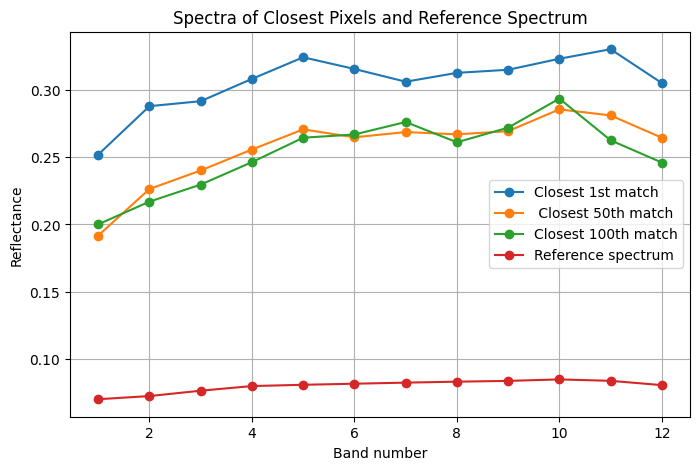

In [28]:
spectra_to_plot = [lowest_pixels[0], lowest_pixels[49], lowest_pixels[99], ref_spectrum]
labels = ["Closest 1st match", " Closest 50th match", "Closest 100th match", "Reference spectrum"]

bands = np.arange(1, 13)

plt.figure(figsize=(8, 5))
for spec, label in zip(spectra_to_plot, labels):
    plt.plot(bands, spec, marker='o', label=label)

plt.xlabel("Band number")
plt.ylabel("Reflectance")
plt.title("Spectra of Closest Pixels and Reference Spectrum")
plt.legend()
plt.grid(True)
plt.show()

The reference spectrum remains nearly flat across all bands. In contrast, the closest matches exhibit noticeable deviations across bands. Between bands 4 and 12, the matched spectra appear more stable compared to the lower bands.

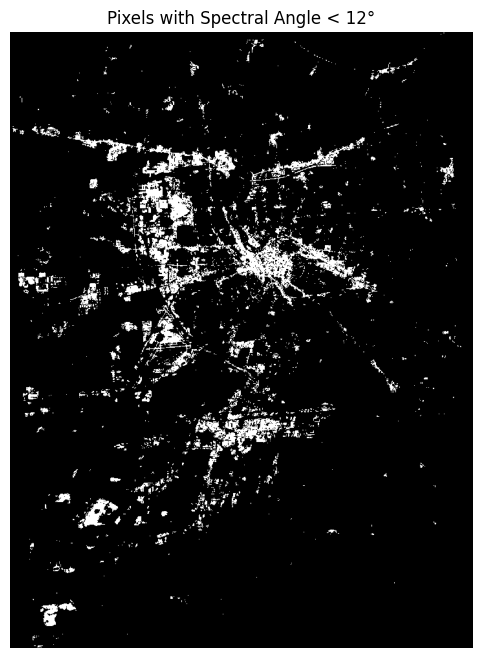

In [ ]:
threshold = np.radians(12)
mask = (angles <= threshold)
mask = mask.astype(np.uint8)
mask_img = mask.reshape(H, W)
plt.figure(figsize=(8, 8))
plt.imshow(mask_img, cmap="gray")
plt.title("Pixels with Spectral Angle < 12°")
plt.axis("off")
plt.show()

In the binary mask, white pixels (value = 1) correspond to asphalt, indicating spectral angles below the 12° threshold, while black pixels (value = 0) represent non-asphalt surfaces. A small number of bare field areas are misclassified as asphalt.